# Messing around with Prophet

## Set up

In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
# Importing the dataset
df = pd.read_csv('data/recruited_daily.csv')
df.head()

,date,Patients Recruited
0,2021-01-07,1
1,2021-01-10,2
2,2021-01-11,2
3,2021-01-12,9
4,2021-02-11,6


## Preprocessing

In [3]:
# Change dates to datetime objects
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date                  datetime64[ns]
Patients Recruited             int64
dtype: object

In [4]:
# Rename column names to 'ds' for the dates and 'y' for the values.
# This is for use with prophet
df.columns = ['ds', 'y']

df.head()

,ds,y
0,2021-01-07,1
1,2021-01-10,2
2,2021-01-11,2
3,2021-01-12,9
4,2021-02-11,6


In [66]:
# # Create a new dataframe with resampled dates as monthly aggregates
# df_monthly = df.set_index('ds').resample('M').sum()
# df_monthly = df_monthly.reset_index()

# df_monthly.head()

In [67]:
# Creating a train-test split for cross validation
# Dates start at Jan 2021 and end Dec 2022 
cut_off_date = '2022-07-07'

# Splitting the dataset based on the above cut off date
train_df = df.loc[df['ds'] <= cut_off_date]
test_df = df.loc[df['ds'] > cut_off_date]

# Output some metrics about the split

train_df_len = train_df.shape[0]
test_df_len = test_df.shape[0]
print(f"length of train :{train_df_len}, length of test: {test_df_len}")
print(f"percentage of data = { round((train_df_len/df.shape[0]) *100)}% train / { round((test_df_len/df.shape[0]) *100)}% test")
print(f"number of days in test: { test_df['ds'].max() - test_df['ds'].min() }")

length of train :227, length of test: 58
percentage of data = 80% train / 20% test
number of days in test: 148 days 00:00:00


In [70]:
# Create a new dataframe with resampled dates as monthly aggregates
train_df_monthly = train_df.set_index('ds').resample('M').sum()
train_df_monthly = train_df_monthly.reset_index()

train_df_monthly.head()

,ds,y
0,2021-01-31,14
1,2021-02-28,11
2,2021-03-31,16
3,2021-04-30,13
4,2021-05-31,10


## Forecasting

**To-do:**
1. Create a train-test spilt for cross validation.
2. Compare predictions with actual values
3. Then forecast for a prediction in the future.
4. Make some commments about the 95 confidence interval.
<br><br><br>

**Things to understand:**
- What is an additive model
- what are the alternatives to prophet and why choose them instead of prophet or vice versa.
- Why doesn't prophet require preprocessing?
- How to use the holidays feature of prophet 

In [71]:
# Train the model
m = Prophet(interval_width=0.95)
model = m.fit(train_df_monthly)

21:36:03 - cmdstanpy - INFO - Chain [1] start processing
21:36:03 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# Creating the future dates to forcast
future_dates = model.make_future_dataframe(periods=4, freq='M')
future_dates.tail()

,ds
18,2022-07-31
19,2022-08-31
20,2022-09-30
21,2022-10-31
22,2022-11-30


In [73]:
# Forecasting output
forecast = model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-31,-5.616254,-76.669238,59.435947,-5.616254,-5.616254,0.0,0.0,0.0,0.0,0.0,0.0,-5.616254
1,2021-02-28,2.126951,-69.722041,70.948705,2.126951,2.126951,0.0,0.0,0.0,0.0,0.0,0.0,2.126951
2,2021-03-31,10.699785,-60.303756,78.849266,10.699785,10.699785,0.0,0.0,0.0,0.0,0.0,0.0,10.699785
3,2021-04-30,18.996075,-46.230781,88.037600,18.996075,18.996075,0.0,0.0,0.0,0.0,0.0,0.0,18.996075
4,2021-05-31,27.568909,-51.212787,99.782966,27.568909,27.568909,0.0,0.0,0.0,0.0,0.0,0.0,27.568909


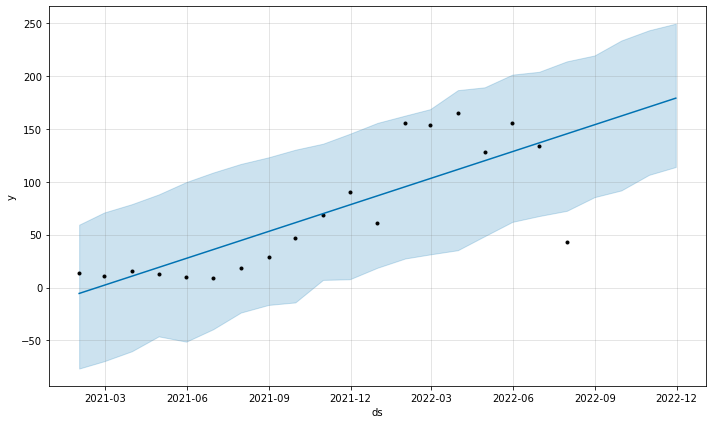

In [76]:
# Forecast plot
plot1 = model.plot(forecast)

21:32:04 - cmdstanpy - INFO - Chain [1] start processing
21:32:04 - cmdstanpy - INFO - Chain [1] done processing


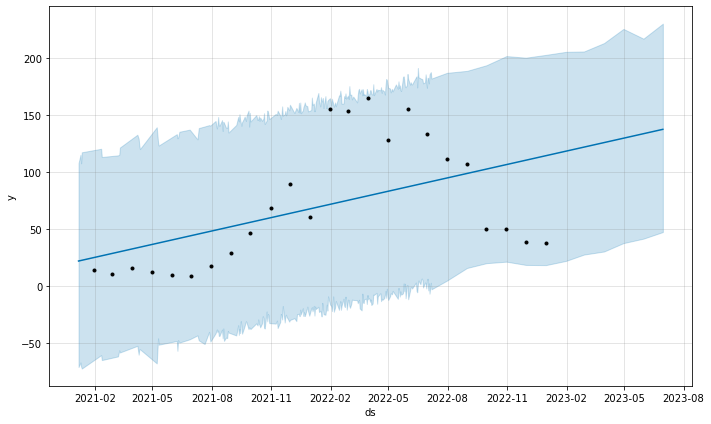

In [64]:
# forecasting with monthly dataframe

# Fit model
m = Prophet(interval_width=0.95)
model2 = m.fit(df_monthly)

# Creating the future dates
future_dates2 = model.make_future_dataframe(periods=12, freq='M')
future_dates2.head()

# Forecasting output
forecast2 = m.predict(future_dates2)

# Forecast plot
plot2 = m.plot(forecast2)

Some notes about what Prophet is doing: <br>
You'll note that I've made no attempt at making the data stationary before shoving it into a model, but apparently the model that prophet is using isn't concerned with stationarity... <br>
*"No. Stationarity is an important condition for some other time series forecasting algorithms such as ARMA or ARIMA, but prophet assumes nothing about stationarity. Prophet rather makes use of features like trend or seasonality, which stationary data by definition do not have"*
<br><br>
I'll probably want to learn how to intepret the plot and dataframe that prophet has output above, next.
...

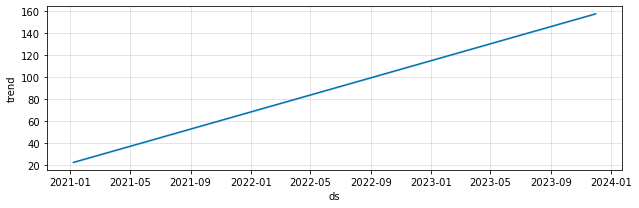

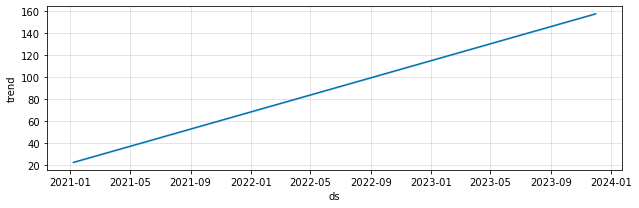

In [16]:
model2.plot_components(forecast2)

## Key Improvements & Caveats